<a href="https://colab.research.google.com/github/umm-e-sulaim/machine-learning-AI/blob/main/logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"application_record[1].csv"

## Data loading

### Subtask:
Load the dataset "application_record[1].csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "application_record[1].csv" into a pandas DataFrame and display its first 5 rows and shape.



In [13]:
import pandas as pd

try:
    df = pd.read_csv('application_record[1].csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'application_record[1].csv' not found.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Check the file format.")
    df = None # Assign None to df in case of error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


(438557, 18)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine data types, missing values, descriptive statistics, unique values of categorical features, and correlations between numerical features.



In [14]:
# Data type examination
print("Data Types:\n", df.dtypes)

# Missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Unique values and frequencies for categorical features
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
for col in categorical_cols:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts(dropna=False)}")

# Correlation between numerical features
numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
print("\nCorrelation Matrix:\n", df[numerical_cols].corr())

Data Types:
 ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Missing Values:
 ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WO

## Data visualization

### Subtask:
Visualize the distributions and relationships of key variables in the dataset.


**Reasoning**:
Generate histograms, box plots, and scatter plot matrix for numerical features, and bar charts for categorical features to visualize the data distributions and relationships.



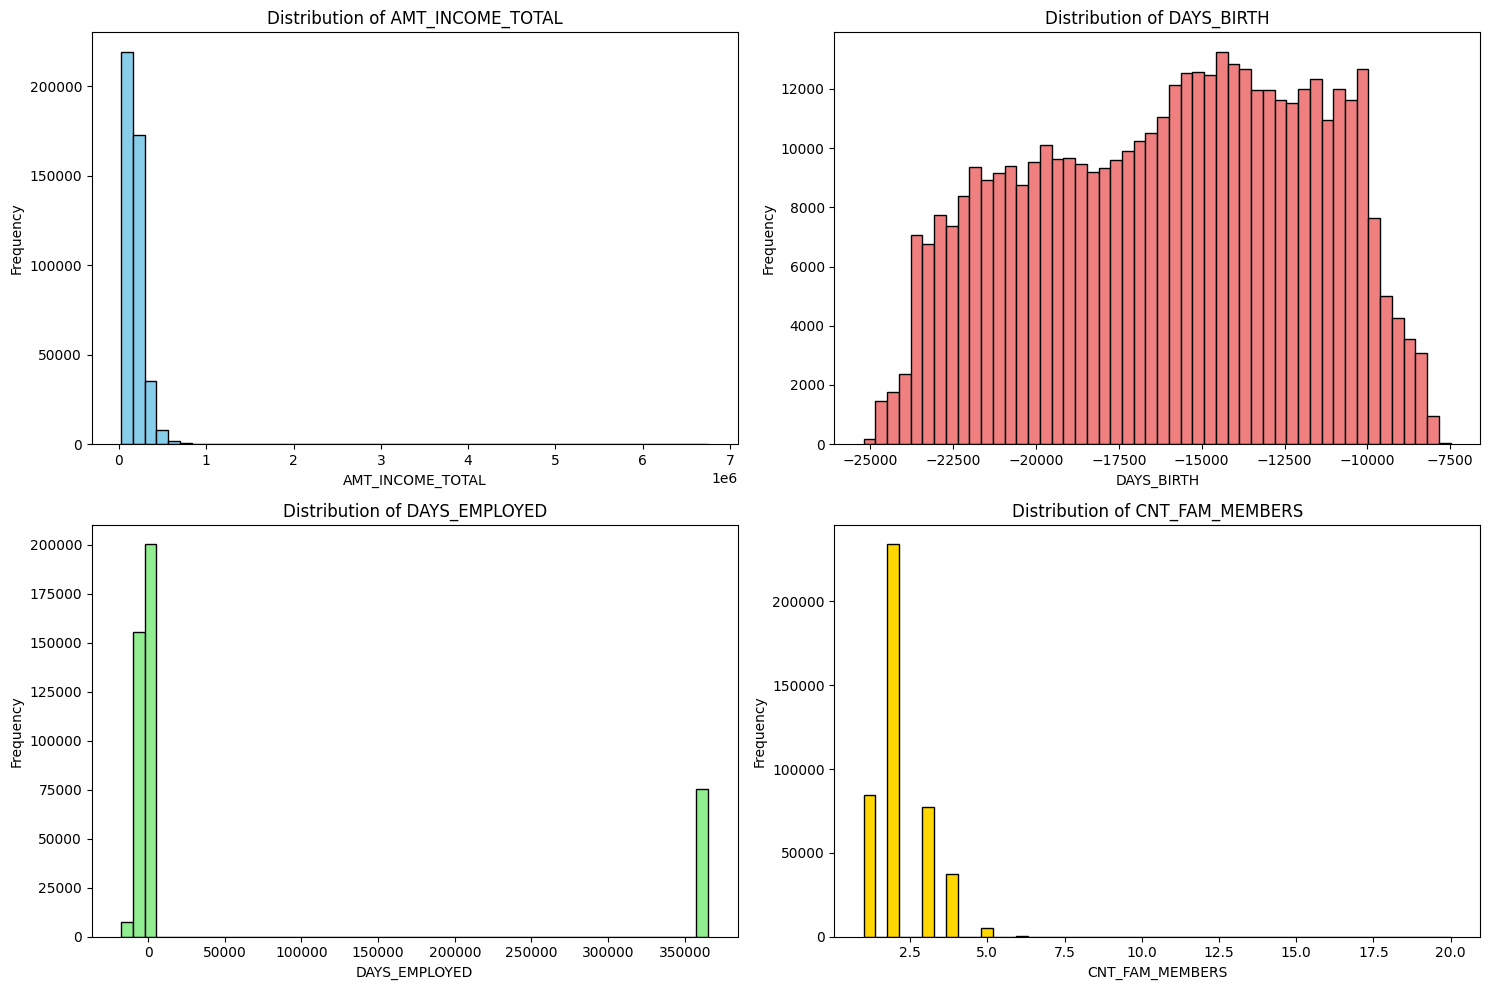

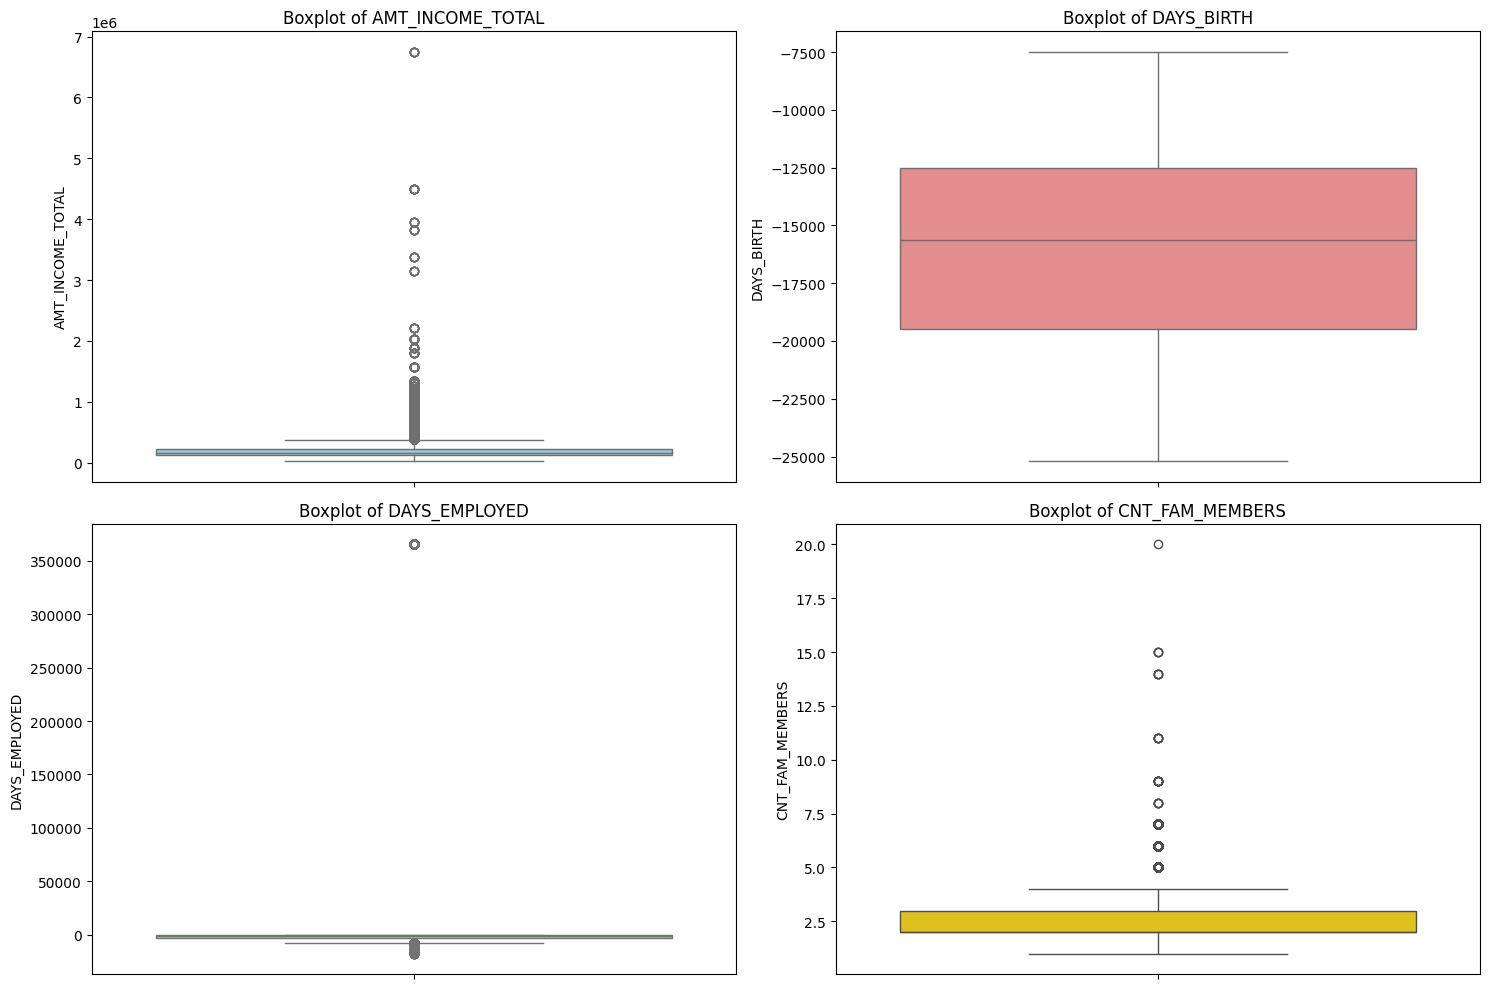

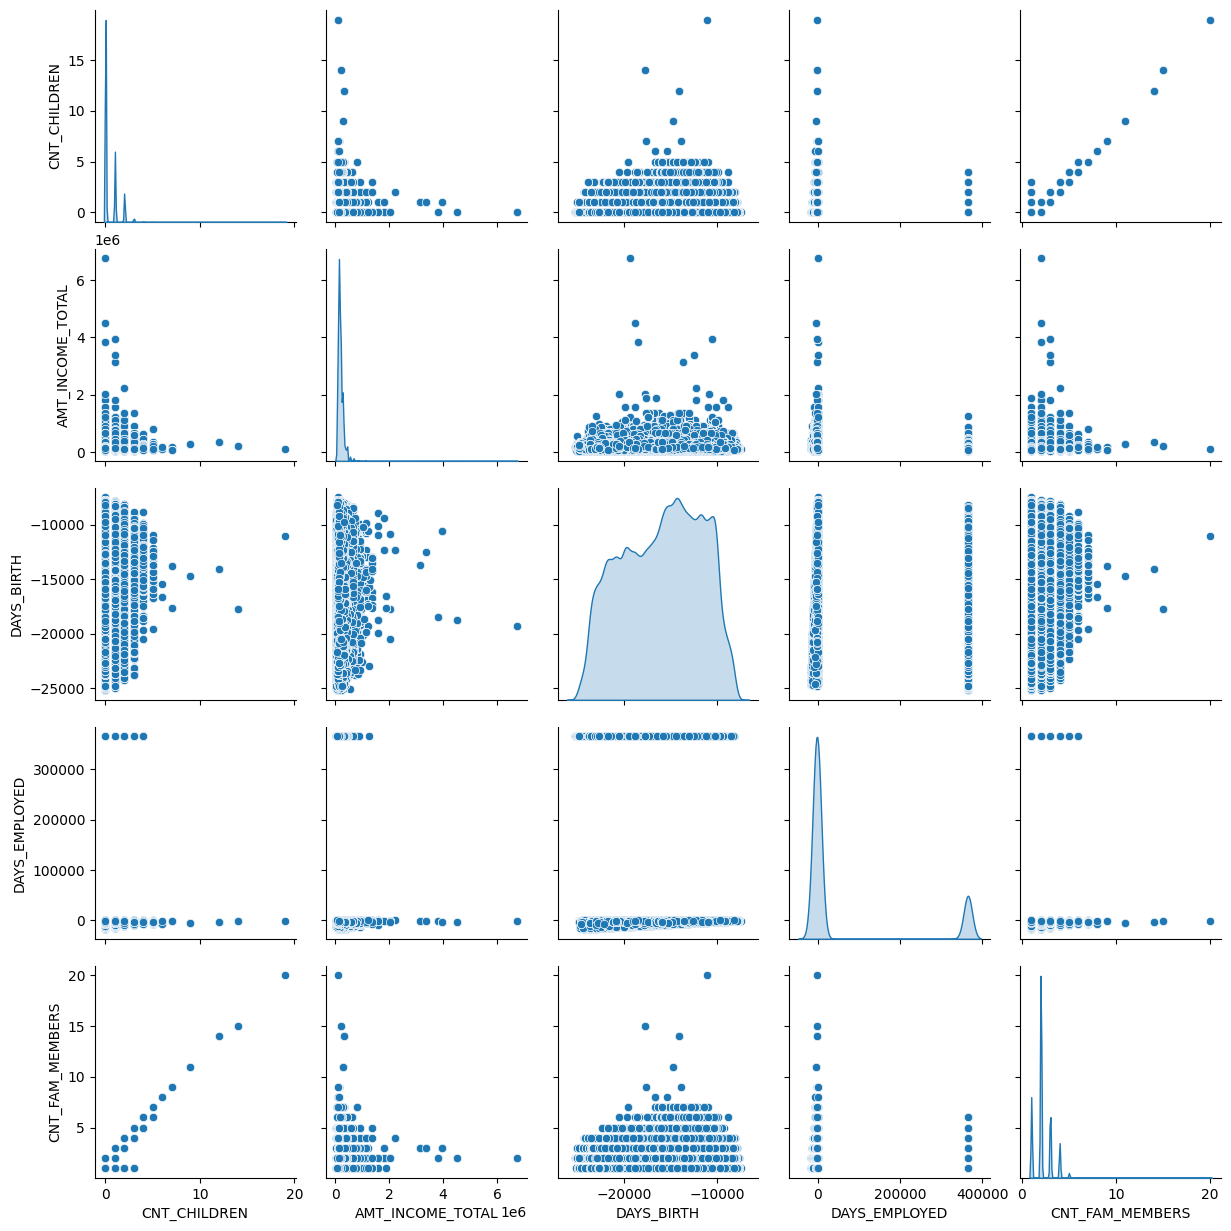

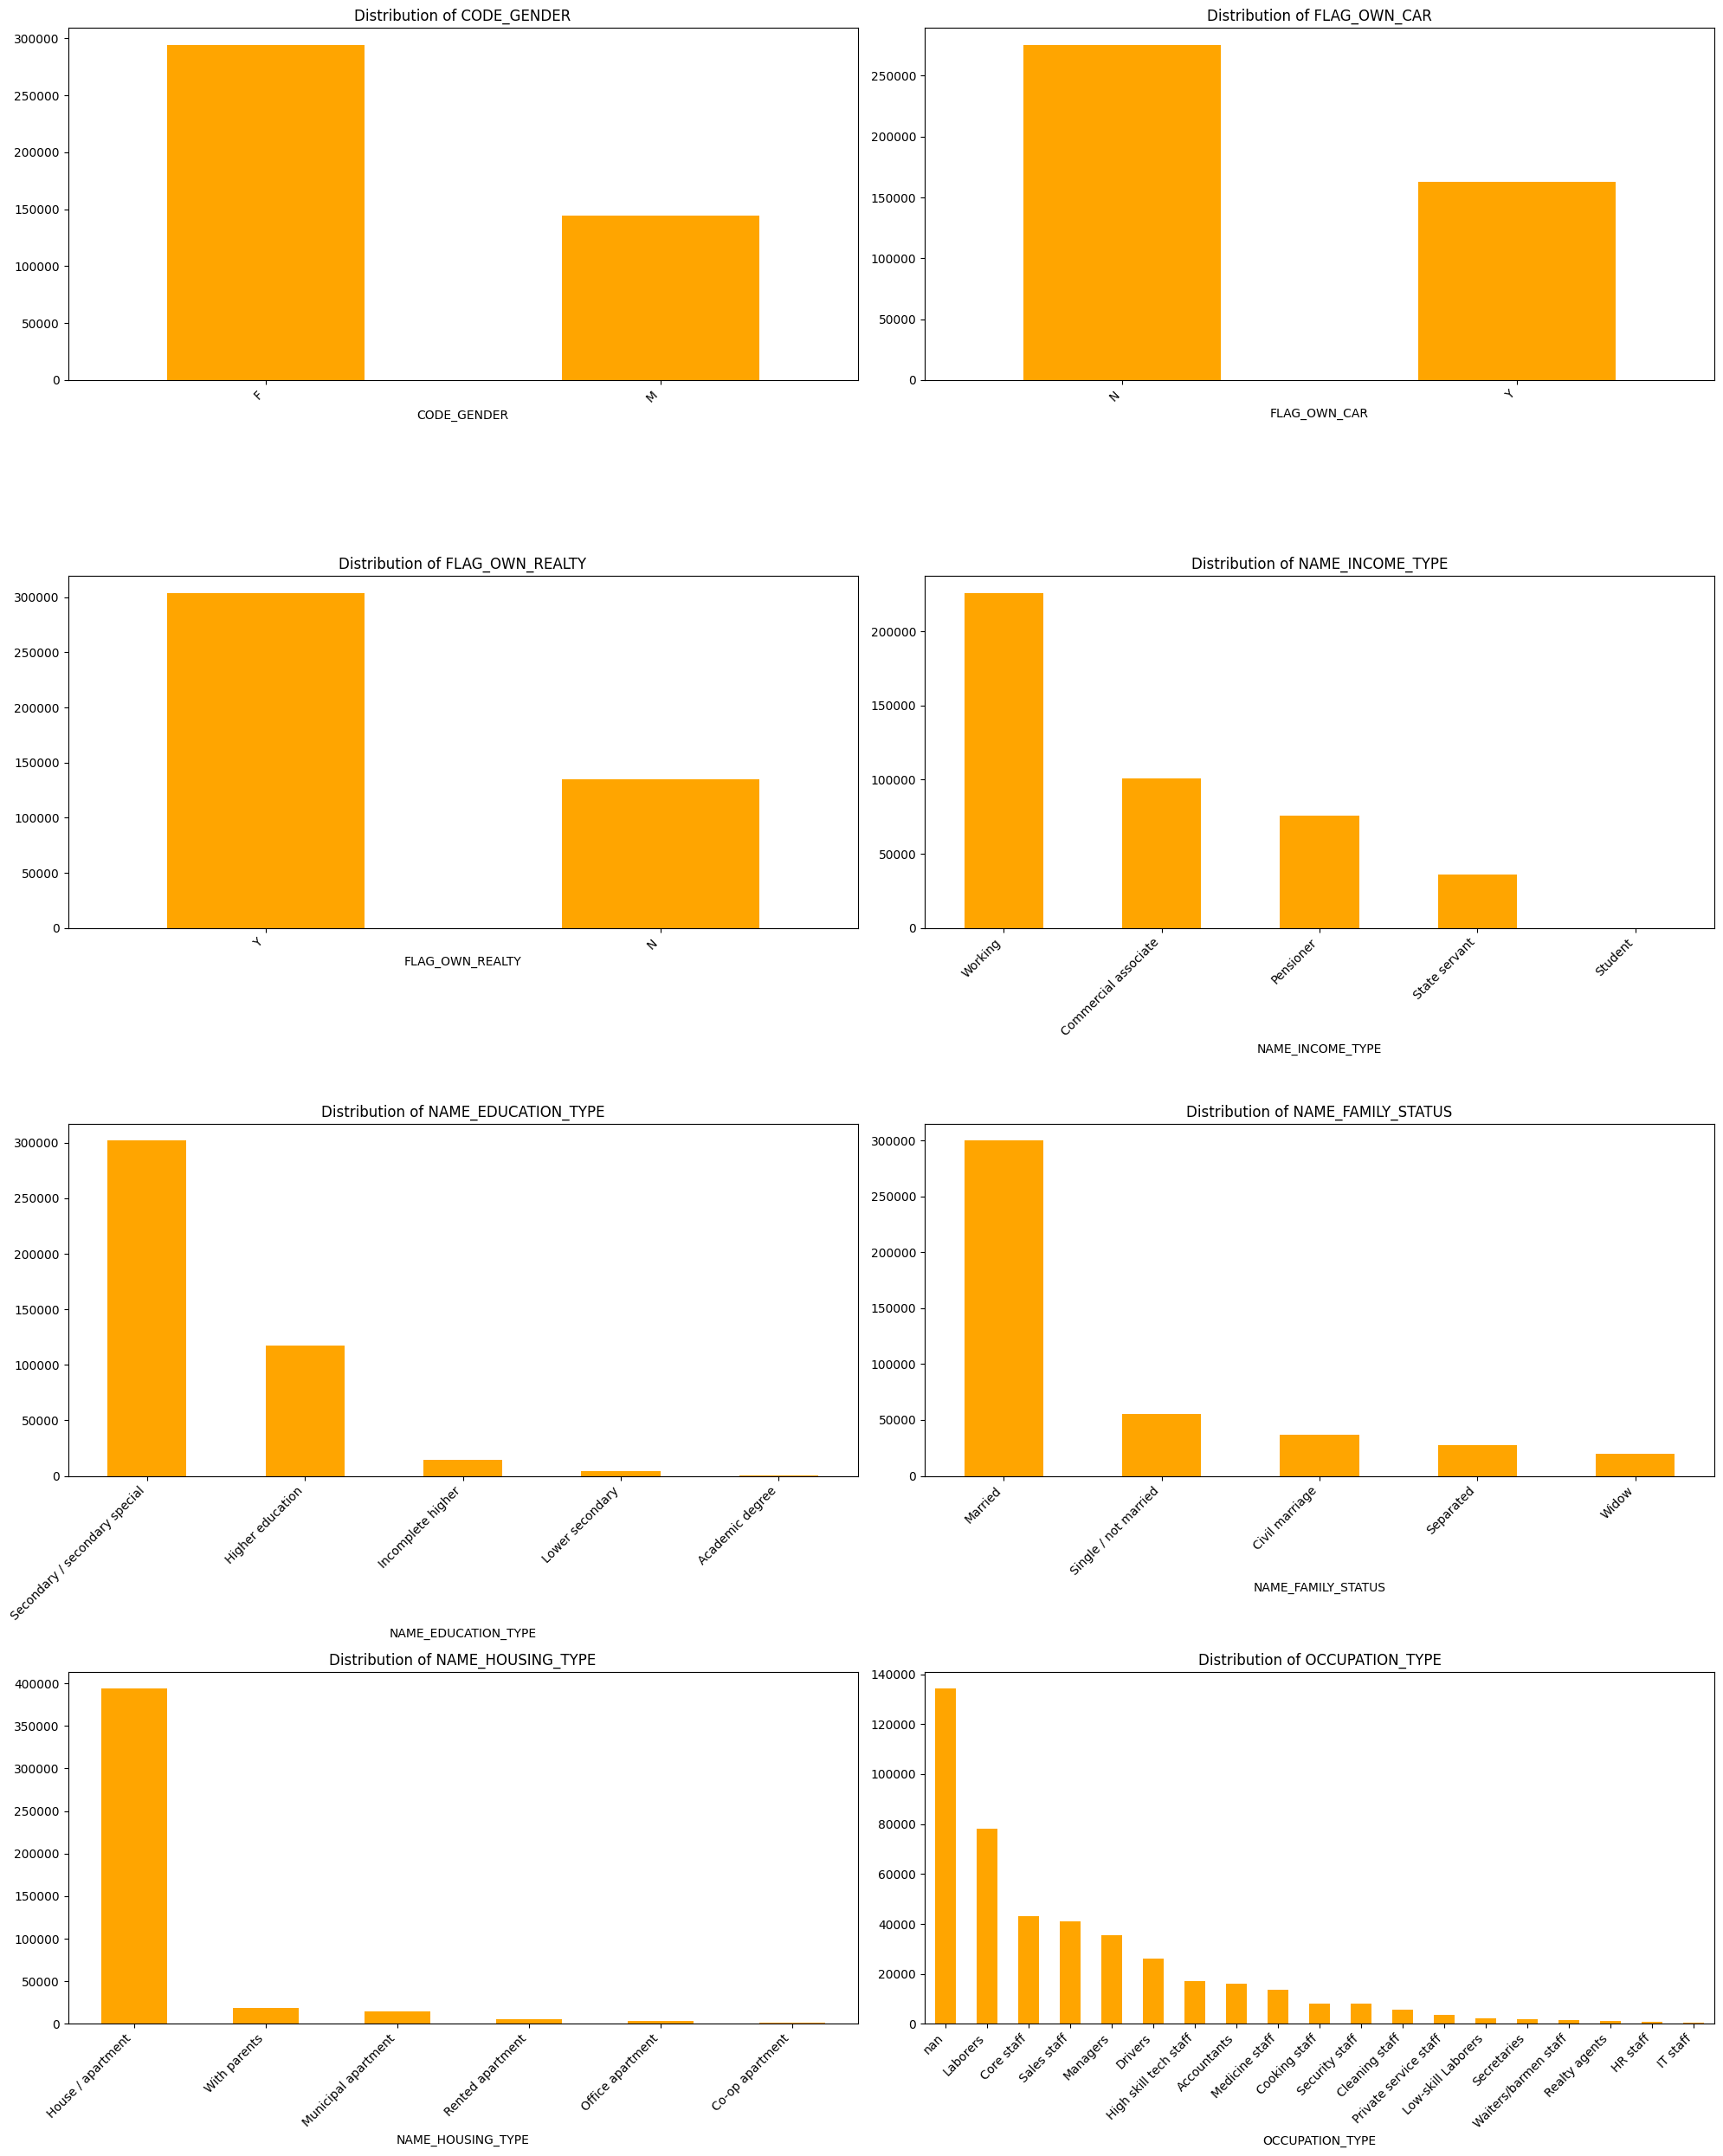

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(df['AMT_INCOME_TOTAL'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['DAYS_BIRTH'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of DAYS_BIRTH')
plt.xlabel('DAYS_BIRTH')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df['DAYS_EMPLOYED'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of DAYS_EMPLOYED')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['CNT_FAM_MEMBERS'], bins=50, color='gold', edgecolor='black')
plt.title('Distribution of CNT_FAM_MEMBERS')
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Box plots for numerical features
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(y=df['AMT_INCOME_TOTAL'], color='skyblue')
plt.title('Boxplot of AMT_INCOME_TOTAL')

plt.subplot(2,2,2)
sns.boxplot(y=df['DAYS_BIRTH'], color='lightcoral')
plt.title('Boxplot of DAYS_BIRTH')

plt.subplot(2,2,3)
sns.boxplot(y=df['DAYS_EMPLOYED'], color='lightgreen')
plt.title('Boxplot of DAYS_EMPLOYED')

plt.subplot(2,2,4)
sns.boxplot(y=df['CNT_FAM_MEMBERS'], color='gold')
plt.title('Boxplot of CNT_FAM_MEMBERS')

plt.tight_layout()
plt.show()


# Scatter plot matrix
numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()

# Bar charts for categorical features
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i + 1)
    df[col].value_counts(dropna=False).plot(kind='bar', color='orange')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout()
plt.show()

## Summary:

### Q&A

No questions were asked in the provided text.


### Data Analysis Key Findings

* **Missing Data:** A significant number of missing values (30.6%) were found in the `OCCUPATION_TYPE` column.  Other columns did not show missing values in the provided output.
* **Potential Outliers:** Potential outliers were identified in `AMT_INCOME_TOTAL`, `DAYS_EMPLOYED`, and `CNT_FAM_MEMBERS` (maximum values significantly higher than the 75th percentile).  Additionally, `CNT_CHILDREN` showed an unusually high maximum value of 19.
* **Correlations:** A strong positive correlation (0.88) exists between `CNT_CHILDREN` and `CNT_FAM_MEMBERS`. A negative correlation was observed between `DAYS_BIRTH` and `DAYS_EMPLOYED`, suggesting older individuals tend to have longer employment history.
* **Data Distribution:** Visualizations revealed skewed distributions for several numerical features, particularly `AMT_INCOME_TOTAL` and `DAYS_EMPLOYED`.


### Insights or Next Steps

* **Handle Missing Data:** Address the substantial missing values in the `OCCUPATION_TYPE` column. Consider imputation techniques or removal, depending on the downstream analysis.
* **Outlier Treatment:** Investigate and handle the identified outliers in `AMT_INCOME_TOTAL`, `DAYS_EMPLOYED`, `CNT_FAM_MEMBERS`, and `CNT_CHILDREN`.  Decide whether to remove, transform, or cap these outliers based on their impact on the analysis.


In [17]:
# prompt: create a dataframe

import pandas as pd
# Create a sample DataFrame (replace with your actual data)
data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
df_new = pd.DataFrame(data)
df_new


,col1,col2
0,1,4
1,2,5
2,3,6


In [18]:
# prompt: a slider using jupyter widgets

import ipywidgets as widgets
from IPython.display import display

# Assuming 'df' is your DataFrame (from the previous code)

# Create a slider widget
slider = widgets.IntSlider(
    value=0,  # Initial value
    min=0,  # Minimum value
    max=len(df) - 1,  # Maximum value (number of rows - 1)
    step=1,  # Step size
    description='Row Index:',
    disabled=False,
    continuous_update=False,  # Update only when the slider is released
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Function to display the row corresponding to the slider value
def update_row(change):
    row_index = change['new']
    if 0 <= row_index < len(df):
        display(df.iloc[[row_index]])

# Observe the slider value changes
slider.observe(update_row, names='value')

# Display the slider
display(slider)


IntSlider(value=0, continuous_update=False, description='Row Index:', max=438556)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
93370,5731367,F,N,Y,0,261000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12709,-3725,1,1,1,0,Accountants,2.0


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
348015,6428715,M,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,Rented apartment,-16229,-1245,1,0,0,0,Laborers,2.0


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
283691,6125512,F,N,Y,0,117000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-23721,365243,1,0,0,0,NaN,1.0


In [19]:
# prompt: create a time series

# Assuming 'df' is your DataFrame (from the previous code)
import ipywidgets as widgets
from IPython.display import display

# Create a slider widget
slider = widgets.IntSlider(
    value=0,  # Initial value
    min=0,  # Minimum value
    max=len(df) - 1,  # Maximum value (number of rows - 1)
    step=1,  # Step size
    description='Row Index:',
    disabled=False,
    continuous_update=False,  # Update only when the slider is released
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Function to display the row corresponding to the slider value
def update_row(change):
    row_index = change['new']
    if 0 <= row_index < len(df):
        display(df.iloc[[row_index]])

# Observe the slider value changes
slider.observe(update_row, names='value')

# Display the slider
display(slider)


IntSlider(value=0, continuous_update=False, description='Row Index:', max=438556)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
233425,6318758,M,N,Y,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-11374,-3929,1,0,0,1,NaN,3.0


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
340666,6397799,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-20196,-11068,1,0,1,0,Drivers,2.0


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
379017,6602226,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-18584,-8151,1,0,0,0,Laborers,2.0


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
119619,5539502,F,N,N,0,225000.0,State servant,Higher education,Married,House / apartment,-9809,-919,1,0,1,1,Core staff,2.0


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [20]:
# prompt: use logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming 'df' is your DataFrame and you've performed necessary preprocessing
# (e.g., handling missing values, encoding categorical features, feature scaling).

# Example:  Let's predict 'FLAG_OWN_CAR' based on 'AMT_INCOME_TOTAL' and 'DAYS_BIRTH'
# (replace with your desired target and features)

# Prepare the data
X = df[['AMT_INCOME_TOTAL', 'DAYS_BIRTH']]
y = df['FLAG_OWN_CAR']

# Convert target variable to numerical (0 and 1)
y = y.map({'Y': 1, 'N': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6477106895293688
              precision    recall  f1-score   support

           0       0.66      0.91      0.76     55078
           1       0.57      0.21      0.31     32634

    accuracy                           0.65     87712
   macro avg       0.62      0.56      0.54     87712
weighted avg       0.63      0.65      0.59     87712

[[49864  5214]
 [25686  6948]]


In [21]:
# prompt: save the data

# Assuming 'df' is your DataFrame (from the previous code)
# and you want to save it to a CSV file named 'processed_data.csv'

try:
    df.to_csv('processed_data.csv', index=False)  # index=False prevents saving row indices
    print("DataFrame saved to 'processed_data.csv'")
except Exception as e:
    print(f"An error occurred while saving the DataFrame: {e}")


DataFrame saved to 'processed_data.csv'


In [23]:
# prompt: load the data

import pandas as pd
# Assuming 'application_record[1].csv' is in the current directory or provide the full path
try:
    df = pd.read_csv('application_record[1].csv')
except FileNotFoundError:
    print("Error: 'application_record[1].csv' not found. Please upload the file or provide the correct path.")
    df = None  # Assign None to df in case of error


In [26]:
# prompt: create a time series data

# Assuming you want to create a time series with a date range and some random values.
import pandas as pd
import numpy as np

# Define the date range
date_rng = pd.date_range(start='1/1/2020', end='1/08/2020', freq='H')

# Create a DataFrame with the date range as the index
df_time = pd.DataFrame(date_rng, columns=['date'])

# Generate some random values
df_time['data_value'] = np.random.randint(0, 100, size=(len(date_rng)))

# Set 'date' as the index
df_time = df_time.set_index('date')

print(df_time.head())


                     data_value
date                           
2020-01-01 00:00:00          73
2020-01-01 01:00:00          29
2020-01-01 02:00:00          48
2020-01-01 03:00:00          65
2020-01-01 04:00:00          66


<ipython-input-26-d3af0a879022>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2020', end='1/08/2020', freq='H')


In [27]:
# prompt: create a dataframe with 2 columns and 10 rows

import pandas as pd

# Create a DataFrame with 2 columns and 10 rows
data = {'col1': range(10), 'col2': range(10, 20)}
df = pd.DataFrame(data)

df


,col1,col2
0,0,10
1,1,11
2,2,12
3,3,13
4,4,14
5,5,15
6,6,16
7,7,17
8,8,18
9,9,19


In [30]:
# prompt: use logistic regression

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6477106895293688
              precision    recall  f1-score   support

           0       0.66      0.91      0.76     55078
           1       0.57      0.21      0.31     32634

    accuracy                           0.65     87712
   macro avg       0.62      0.56      0.54     87712
weighted avg       0.63      0.65      0.59     87712

[[49864  5214]
 [25686  6948]]


In [33]:
# prompt: train the model

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6477106895293688
              precision    recall  f1-score   support

           0       0.66      0.91      0.76     55078
           1       0.57      0.21      0.31     32634

    accuracy                           0.65     87712
   macro avg       0.62      0.56      0.54     87712
weighted avg       0.63      0.65      0.59     87712

[[49864  5214]
 [25686  6948]]


In [35]:
# prompt: test the model

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6477106895293688
              precision    recall  f1-score   support

           0       0.66      0.91      0.76     55078
           1       0.57      0.21      0.31     32634

    accuracy                           0.65     87712
   macro avg       0.62      0.56      0.54     87712
weighted avg       0.63      0.65      0.59     87712

[[49864  5214]
 [25686  6948]]


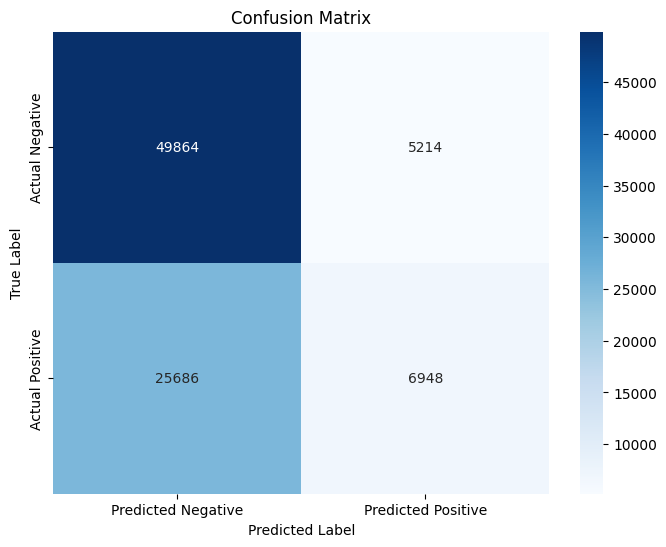

In [32]:
# prompt: create a confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from the previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [36]:
# prompt: 10 random numbers using numpy

import numpy as np

random_numbers = np.random.rand(10)
random_numbers


array([0.40695226, 0.17417415, 0.9171474 , 0.06848508, 0.44931068,
       0.35325553, 0.37177107, 0.65092018, 0.04374717, 0.96402526])

In [37]:
# prompt: randomly select 5 items from a list

import random

# Assuming your list is stored in a variable called 'my_list'
# Replace this with your actual list

my_list = list(range(1, 21))  # Example list: numbers from 1 to 20

# Use random.sample to select 5 unique random items without replacement
random_items = random.sample(my_list, 5)

random_items


[19, 12, 6, 5, 10]

In [38]:
# prompt: a slider using jupyter widgets

import ipywidgets as widgets
from IPython.display import display

# Assuming 'df' is your DataFrame (from the previous code)

# Create a slider widget
slider = widgets.IntSlider(
    value=0,  # Initial value
    min=0,  # Minimum value
    max=len(df) - 1,  # Maximum value (number of rows - 1)
    step=1,  # Step size
    description='Row Index:',
    disabled=False,
    continuous_update=False,  # Update only when the slider is released
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Function to display the row corresponding to the slider value
def update_row(change):
    row_index = change['new']
    if 0 <= row_index < len(df):
        display(df.iloc[[row_index]])

# Observe the slider value changes
slider.observe(update_row, names='value')

# Display the slider
display(slider)


IntSlider(value=0, continuous_update=False, description='Row Index:', max=9)

In [39]:
# prompt: import the requires required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import random


In [40]:
# prompt: load the Financial Dataset

import pandas as pd
# Assuming 'application_record[1].csv' is in the current directory or provide the full path
try:
    df = pd.read_csv('application_record[1].csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'application_record[1].csv' not found. Please upload the file or provide the correct path.")
    df = None  # Assign None to df in case of error


Dataset loaded successfully.


In [41]:
# prompt: . Convert 'Date' to datetime and set it as index

import pandas as pd
# Assuming 'df' is your DataFrame and it has a column named 'Date'
# Convert the 'Date' column to datetime objects
if df is not None and 'DAYS_BIRTH' in df.columns:
    df['Date'] = pd.to_datetime(df['DAYS_BIRTH'], unit='D', origin='1899-12-30')
    # Set 'Date' as the index
    df = df.set_index('Date')
    print(df.head())
else:
    print("'DAYS_BIRTH' column not found or DataFrame 'df' is not available.")


                 ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
Date                                                                         
1867-02-16  5008804           M            Y               Y             0   
1867-02-16  5008805           M            Y               Y             0   
1841-03-15  5008806           M            Y               Y             0   
1847-09-04  5008808           F            N               Y             0   
1847-09-04  5008809           F            N               Y             0   

            AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
Date                                                 
1867-02-16          427500.0               Working   
1867-02-16          427500.0               Working   
1841-03-15          112500.0               Working   
1847-09-04          270000.0  Commercial associate   
1847-09-04          270000.0  Commercial associate   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
Date   

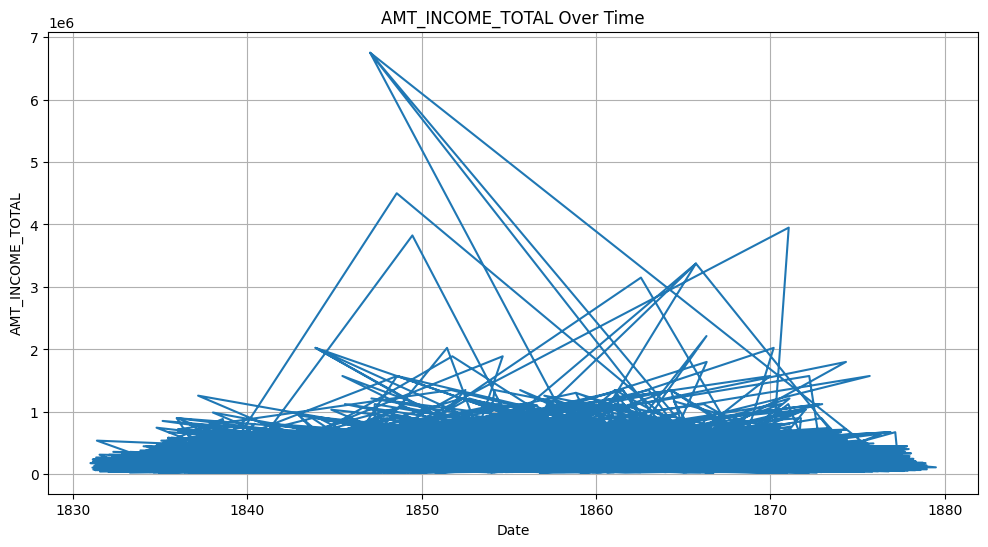

In [44]:
# prompt: Plot Closing Prices Over Time

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it has a column named 'DAYS_BIRTH'
# Convert the 'DAYS_BIRTH' column to datetime objects and set it as the index
if df is not None and 'DAYS_BIRTH' in df.columns:
    # Convert 'DAYS_BIRTH' to a date format
    df['Date'] = pd.to_datetime(df['DAYS_BIRTH'], unit='D', origin='1899-12-30')

    # Example: Plot 'AMT_INCOME_TOTAL' over time
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['AMT_INCOME_TOTAL'])
    plt.xlabel('Date')
    plt.ylabel('AMT_INCOME_TOTAL')
    plt.title('AMT_INCOME_TOTAL Over Time')
    plt.grid(True)
    plt.show()
else:
    print("'DAYS_BIRTH' column not found or DataFrame 'df' is not available.")
